## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
train, test = keras.datasets.cifar10.load_data()

# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [3]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
# 設定超參數
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.25, 0.5]

In [6]:
results = {}

import itertools
for ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout Ratio = %.2f" % (ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "EXP-Dropout Ratio-%s" % (str(ratio))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout Ratio = 0.10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)    

196/196 [==============================] - 7s 35ms/step - loss: 1.1739 - accuracy: 0.5759 - val_loss: 1.3492 - val_accuracy: 0.5279
Epoch 48/50
196/196 [==============================] - 7s 38ms/step - loss: 1.1620 - accuracy: 0.5812 - val_loss: 1.3413 - val_accuracy: 0.5266
Epoch 49/50
196/196 [==============================] - 8s 39ms/step - loss: 1.1635 - accuracy: 0.5812 - val_loss: 1.3585 - val_accuracy: 0.5228
Epoch 50/50
196/196 [==============================] - 7s 34ms/step - loss: 1.1588 - accuracy: 0.5808 - val_loss: 1.3536 - val_accuracy: 0.5237
Experiment with Dropout Ratio = 0.25
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                      

196/196 [==============================] - 7s 37ms/step - loss: 1.5081 - accuracy: 0.4587 - val_loss: 1.4673 - val_accuracy: 0.4769
Epoch 44/50
196/196 [==============================] - 8s 38ms/step - loss: 1.5066 - accuracy: 0.4588 - val_loss: 1.4652 - val_accuracy: 0.4773
Epoch 45/50
196/196 [==============================] - 8s 40ms/step - loss: 1.5020 - accuracy: 0.4597 - val_loss: 1.4459 - val_accuracy: 0.4906
Epoch 46/50
196/196 [==============================] - 7s 38ms/step - loss: 1.5019 - accuracy: 0.4611 - val_loss: 1.4989 - val_accuracy: 0.4713
Epoch 47/50
196/196 [==============================] - 7s 38ms/step - loss: 1.5040 - accuracy: 0.4611 - val_loss: 1.4644 - val_accuracy: 0.4836
Epoch 48/50
196/196 [==============================] - 7s 33ms/step - loss: 1.4992 - accuracy: 0.4600 - val_loss: 1.4739 - val_accuracy: 0.4795
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4990 - accuracy: 0.4649 - val_loss: 1.4665 - val_accuracy: 0.4834
Epoc

196/196 [==============================] - 9s 44ms/step - loss: 1.9525 - accuracy: 0.2634 - val_loss: 2.0163 - val_accuracy: 0.2657
Epoch 40/50
196/196 [==============================] - 8s 40ms/step - loss: 1.9525 - accuracy: 0.2644 - val_loss: 2.0147 - val_accuracy: 0.2662
Epoch 41/50
196/196 [==============================] - 7s 38ms/step - loss: 1.9439 - accuracy: 0.2686 - val_loss: 2.0026 - val_accuracy: 0.2763
Epoch 42/50
196/196 [==============================] - 8s 38ms/step - loss: 1.9474 - accuracy: 0.2666 - val_loss: 1.9959 - val_accuracy: 0.2794
Epoch 43/50
196/196 [==============================] - 7s 38ms/step - loss: 1.9465 - accuracy: 0.2670 - val_loss: 2.0233 - val_accuracy: 0.2635
Epoch 44/50
196/196 [==============================] - 7s 38ms/step - loss: 1.9474 - accuracy: 0.2684 - val_loss: 1.9975 - val_accuracy: 0.2855
Epoch 45/50
196/196 [==============================] - 7s 38ms/step - loss: 1.9474 - accuracy: 0.2650 - val_loss: 1.9934 - val_accuracy: 0.2727
Epoc

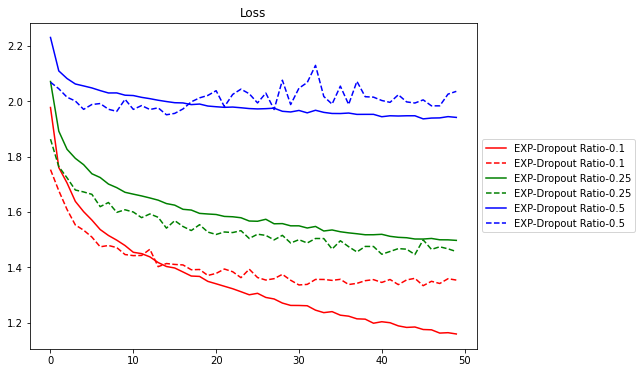

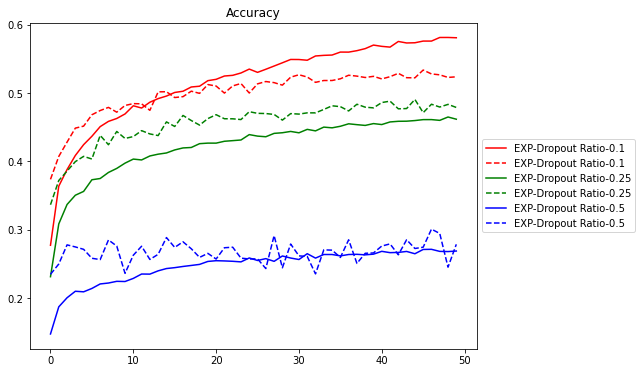

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()